In [11]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "C:/Users/ayevc/Downloads/PetImages/Cat"
    DOGS = "C:/Users/ayevc/Downloads/PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()


  0%|                                                                              | 14/12501 [00:00<01:29, 139.96it/s]

C:/Users/ayevc/Downloads/PetImages/Cat


  0%|                                                                              | 14/12501 [00:00<01:29, 139.85it/s]

C:/Users/ayevc/Downloads/PetImages/Dog


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [01:35<00:00, 130.52it/s]
C:\Users\ayevc\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


Cats: 12476
Dogs: 12470


In [12]:
training_data = np.load('training_data.npy', allow_pickle=True)

In [13]:
print(len(training_data))

24946


In [15]:
print(training_data[1])

[array([[ 98,  63,  85, ..., 124, 133,  88],
        [116, 149, 136, ..., 125, 155, 115],
        [122, 139, 115, ..., 136, 157, 136],
        ...,
        [ 83,  83,  41, ..., 184, 138, 104],
        [ 96,  62,  72, ..., 174, 119, 156],
        [ 69,  68, 109, ..., 134, 170, 128]], dtype=uint8) array([0., 1.])]


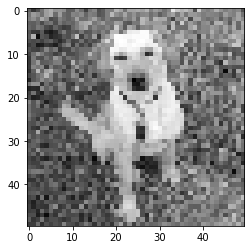

In [17]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap='gray')
plt.show()

In [18]:
training_data[1][1]

array([0., 1.])